In [39]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split as split
#from sklearn.neighbors import KNeighborsClassifier as knn_c
import pydataset
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [6]:
iris = pydataset.data('iris')

In [7]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [9]:
X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
Y = iris['Species']
x_treino, y_treino, x_teste, y_teste, t = train_test_split(X, Y, test_size=0.3)

ValueError: not enough values to unpack (expected 5, got 4)

In [17]:
X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
Y = iris['Species']
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.3)

In [18]:
knn = KNeighborsClassifier(5)

In [19]:
knn.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
classes = knn.predict(x_teste)

In [21]:
classes

array(['setosa', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor'], dtype=object)

In [27]:
df_comparacao = pd.DataFrame(
    classes, columns=['Predição']
)

In [28]:
df_comparacao.head()

,Predição
0,setosa
1,setosa
2,virginica
3,versicolor
4,versicolor


In [32]:
df_comparacao['Correto'] = y_teste.values

In [33]:
df_comparacao.head()

,Predição,Correto
0,setosa,setosa
1,setosa,setosa
2,virginica,versicolor
3,versicolor,versicolor
4,versicolor,versicolor


In [34]:
knn.score(x_teste, y_teste)

0.9555555555555556

In [35]:
valores_k = range(1, 20, 2)

In [36]:
resultados = {}
for k in valores_k:
    knn = KNeighborsClassifier(k)
    knn.fit(x_treino, y_treino)
    resultados[k] = knn.score(x_teste, y_teste)

In [37]:
resultados

{1: 0.93333333333333335,
 3: 0.93333333333333335,
 5: 0.9555555555555556,
 7: 1.0,
 9: 0.97777777777777775,
 11: 0.9555555555555556,
 13: 0.97777777777777775,
 15: 1.0,
 17: 1.0,
 19: 1.0}

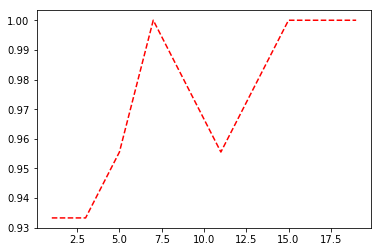

In [43]:
plt.plot(list(resultados.keys()), list(resultados.values()), 'r--')